In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from h3 import h3
from folium import Map, Marker, GeoJson

from folium import Map, Marker, GeoJson
from folium.plugins import MarkerCluster
import branca.colormap as cm
from branca.colormap import linear
import folium
import json
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np

import statistics

from geojson.feature import *
from area import area

import copy
from IPython.display import Image, display
from IPython.utils.text import columnize
import warnings
warnings.filterwarnings('ignore')

In [0]:
!pip install h3

  Created wheel for h3: filename=h3-3.4.3-cp36-cp36m-linux_x86_64.whl size=81858 sha256=4aac7e7d90ac97e1749633b722ca43759bb435714e5fbbef47f1f67c4d1022d8
  Stored in directory: /root/.cache/pip/wheels/7f/8e/74/c5ae2b6a5e3f28239b9bea822e38a08075a5eb05589a0d2a7c
Successfully built h3


In [0]:
!pip install geojson

In [0]:
!pip install area

  Created wheel for area: filename=area-1.1.1-cp36-none-any.whl size=3609 sha256=c4c5b944e8ce8440e293cb27744d4c4824e90800ace5042948af0744863d3ac8
  Stored in directory: /root/.cache/pip/wheels/66/c0/12/b2ef12e07a617ba6f7aaeb32348ea6f14205cc1985f51a134e
Successfully built area


In [0]:
data = pd.read_csv('/content/drive/My Drive/BERT/testRideData.csv')
data.head()

,acceptedDriverData/driverId,acceptedTime,customerComments,destination/latitude,destination/longitude,destinationLocationEnglish,destinationLocationHindi,driverId,driverMobile,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/distance,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/location/0,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/location/1,driversArray/0/7vT2uLlCWKT6tcpvepXE5Tb7nFe2/time,endTime,invoiceId,otpValue,paymentId,paymentMode,projectRideDistance,projectedPickUpTime,projectedRideCost,projectedRideCostWithOffer,projectedRideTime,requestedTime,rideId,riderId,riderInvoiceId,riderMobile,riderName,riderPaymentId,riderRating,source/latitude,source/longitude,sourceLocationEnglish,sourceLocationHindi,startTime,startedDriverData/datetime,startedDriverData/driverId,startedDriverData/latitude,startedDriverData/longitude,...,responses/1578490159665/dXJq62VDE2ZFdsCTIcBfARXB2b82,responses/1578494729177/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495002666/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495405978/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495493781/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495534886/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495747898/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495869888/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578495927186/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578496044885/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578496093277/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578578788782/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1578581945784/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1578639799444/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1578741858596/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579007570552/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579074449024/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579095773022/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579166864065/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/distance,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/location/0,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/location/1,driversArray/2/Gt9KOFgWwcPiUdrohkgAUFoDiXD2/time,responses/1579176048381/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579189939374/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579191425669/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579249101464/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579249107642/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579249170185/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579249177236/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579250131760/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579251135716/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579253802416/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579253800977/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254052326/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254379221/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254473606/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579254618196/Gt9KOFgWwcPiUdrohkgAUFoDiXD2,responses/1579757911919/7vT2uLlCWKT6tcpvepXE5Tb7nFe2,responses/1579771490451/7vT2uLlCWKT6tcpvepXE5Tb7nFe2
0,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:34:41,NaN,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,1.787755,28.694162,77.189727,631.0,2019-05-06 21:35:19,-LeCt0L8PqXL491I7YGn,774,-LeCt61DF-A2B7uF4Pu6,cash,1.79 km,631.0,25.00,30.00,6 mins,2019-05-06 21:34:37,-LeCswkVZouYyOfuzfsQ,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeCt0L8PqXL491I7YGo,8.368318e+09,NaN,-LeCt62f5Rtbnh-PsxKL,3.5,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-06 21:34:56,2019-05-06 21:34:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.694188,77.189562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:48:23,NaN,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,1.787761,28.694153,77.189730,631.0,2019-05-06 21:50:57,-LeCwLXMwfkcuv8mknV3,869,-LeCwfVlIXmrkiVLPE-9,cash,1.79 km,63

In [0]:
data.isnull().any()

acceptedDriverData/driverId                             False
acceptedTime                                            False
customerComments                                         True
destination/latitude                                    False
destination/longitude                                   False
                                                        ...  
responses/1579254379221/Gt9KOFgWwcPiUdrohkgAUFoDiXD2     True
responses/1579254473606/Gt9KOFgWwcPiUdrohkgAUFoDiXD2     True
responses/1579254618196/Gt9KOFgWwcPiUdrohkgAUFoDiXD2     True
responses/1579757911919/7vT2uLlCWKT6tcpvepXE5Tb7nFe2     True
responses/1579771490451/7vT2uLlCWKT6tcpvepXE5Tb7nFe2     True
Length: 502, dtype: bool

In [0]:
data1 = data.copy()
data1 = data1.dropna(axis='columns')
data1.head()

,acceptedDriverData/driverId,acceptedTime,destination/latitude,destination/longitude,destinationLocationEnglish,destinationLocationHindi,driverId,driverMobile,endTime,invoiceId,otpValue,paymentId,paymentMode,projectRideDistance,projectedRideCost,projectedRideCostWithOffer,requestedTime,riderId,riderInvoiceId,riderPaymentId,source/latitude,source/longitude,sourceLocationEnglish,sourceLocationHindi,startTime,startedDriverData/datetime,startedDriverData/driverId,startedDriverData/latitude,startedDriverData/longitude,status,type
0,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:34:41,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-06 21:35:19,-LeCt0L8PqXL491I7YGn,774,-LeCt61DF-A2B7uF4Pu6,cash,1.79 km,25.00,30.00,2019-05-06 21:34:37,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeCt0L8PqXL491I7YGo,-LeCt62f5Rtbnh-PsxKL,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-06 21:34:56,2019-05-06 21:34:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.694188,77.189562,Trip Ended,Solo
1,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-06 21:48:23,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-06 21:50:57,-LeCwLXMwfkcuv8mknV3,869,-LeCwfVlIXmrkiVLPE-9,cash,1.79 km,25.00,30.00,2019-05-06 21:48:21,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeCwLXN5PeQuI1s3UMj,-LeCwfVmI_st7R6Mgsch,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-06 21:49:32,2019-05-06 21:48:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.694144,77.189718,Trip Ended,Solo
2,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-07 11:36:10,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-07 11:36:43,-LeFtcddkFsmfab0LtaE,536,-LeFtfX5dO2he9Ry_qg5,cash,1.79 km,25.00,30.00,2019-05-07 11:36:06,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeFtcdhyV0EVa5bj1s1,-LeFtfX6H8Ius2GdH6WP,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-07 11:36:31,2019-05-07 11:36:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.698000,77.206000,Trip Ended,Solo
3,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-07 21:19:20,28.683289,77.203283,"33-e, Block E, Kamla Nagar, Delhi, 110007, India","33-ई, ब्लॉक ई, कमला नगर, दिल्ली, 110007, भारत",7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-07 21:20:10,-LeHz6Q_jvPZDCsGNIt5,442,-LeHzDncje_POmTobyyV,cash,2.15 km,26.48,31.78,2019-05-07 21:19:13,zBoOFyivDISeabYpGUzCNKe3By52,-LeHz6Qbx_On8I6rnHEa,-LeHzDndreo-VfakyYvx,28.692583,77.194582,"5A, Bhama Shah Marg, Near Gurudwara Nanak Piao...","5A, भामा शाह मार्ग, गुरुद्वारा नानक प्याऊ के प...",2019-05-07 21:19:40,2019-05-07 21:18:00,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.689111,77.194208,Trip Ended,Solo
4,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,2019-05-08 14:56:55,28.685740,77.206383,Ramjas College,रामजस कॉलेज,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,9876543210,2019-05-08 14:57:12,-LeLl871sY1idJkvELUL,572,-LeLl9BpsxBizqo1kcyg,cash,1.79 km,25.00,37.50,2019-05-08 14:56:48,6MargTYvX3gMIxoBFr0nz5skr1K3,-LeLl871sY1idJkvELUM,-LeLl9BpsxBizqo1kcyh,28.698443,77.207394,"11, Banda Bahadur Marg, Outram Lines, Mukherje...","11, बंदा बहादुर मार्ग, आउट्राम लाइन्स, मुखर्जी...",2019-05-08 14:57:07,2019-05-08 14:56:01,7vT2uLlCWKT6tcpvepXE5Tb7nFe2,28.702165,77.194101,Trip Ended,Solo


In [0]:
data1.shape

(1257, 31)

In [0]:
data1.columns

Index(['acceptedDriverData/driverId', 'acceptedTime', 'destination/latitude',
       'destination/longitude', 'destinationLocationEnglish',
       'destinationLocationHindi', 'driverId', 'driverMobile', 'endTime',
       'invoiceId', 'otpValue', 'paymentId', 'paymentMode',
       'projectRideDistance', 'projectedRideCost',
       'projectedRideCostWithOffer', 'requestedTime', 'riderId',
       'riderInvoiceId', 'riderPaymentId', 'source/latitude',
       'source/longitude', 'sourceLocationEnglish', 'sourceLocationHindi',
       'startTime', 'startedDriverData/datetime', 'startedDriverData/driverId',
       'startedDriverData/latitude', 'startedDriverData/longitude', 'status',
       'type'],
      dtype='object')

In [0]:
#convert the locations to float32 and datetime to str
datatypes = {'acceptedTime': 'str',
            'source/latitude': 'float32',
            'source/longitude':'float32'}

In [0]:
columns = list(datatypes.keys())

In [0]:
columns

['acceptedTime', 'source/latitude', 'source/longitude']

In [0]:
data1.shape

(1257, 31)

In [0]:
chunksize = 1257

In [0]:
# list to hold the batch dataframe
df_list = []

for df_chunk in tqdm(pd.read_csv('/content/drive/My Drive/BERT/testRideData.csv', dtype=datatypes,chunksize=chunksize,usecols=columns)):
    # Alternatively, append the chunk to list and merge all
    df_list.append(df_chunk)

1it [00:00, 34.52it/s]


In [0]:
df_list

[             acceptedTime  source/latitude  source/longitude
 0     2019-05-06 21:34:41        28.698442         77.207397
 1     2019-05-06 21:48:23        28.698442         77.207397
 2     2019-05-07 11:36:10        28.698442         77.207397
 3     2019-05-07 21:19:20        28.692583         77.194580
 4     2019-05-08 14:56:55        28.698442         77.207397
 ...                   ...              ...               ...
 1252  2020-01-22 18:01:13        28.694111         77.189728
 1253  2020-01-23 11:05:16        28.694080         77.189713
 1254  2020-01-23 11:08:31        28.694082         77.189713
 1255  2020-01-23 14:49:15        28.694113         77.189735
 1256  2020-01-23 14:54:50        28.694113         77.189705
 
 [1257 rows x 3 columns]]

In [0]:
df_list1 = df_list.copy()

In [0]:
# Merge them all
ride_df = pd.concat(df_list1)
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 3 columns):
acceptedTime        1257 non-null object
source/latitude     1257 non-null float32
source/longitude    1257 non-null float32
dtypes: float32(2), object(1)
memory usage: 19.8+ KB


In [0]:
ride_df

,acceptedTime,source/latitude,source/longitude
0,2019-05-06 21:34:41,28.698442,77.207397
1,2019-05-06 21:48:23,28.698442,77.207397
2,2019-05-07 11:36:10,28.698442,77.207397
3,2019-05-07 21:19:20,28.692583,77.194580
4,2019-05-08 14:56:55,28.698442,77.207397
...,...,...,...
1252,2020-01-22 18:01:13,28.694111,77.189728
1253,2020-01-23 11:05:16,28.694080,77.189713
1254,2020-01-23 11:08:31,28.694082,77.189713
1255,2020-01-23 14:49:15,28.694113,77.189735


Text(0.5, 1.0, 'Pickup_Locations')

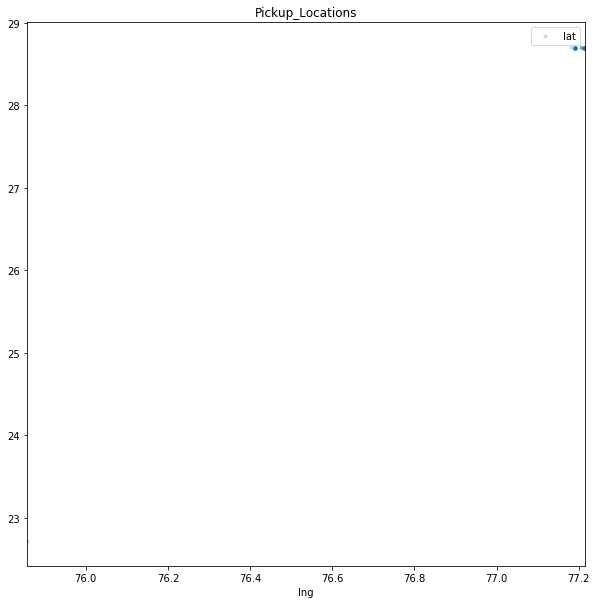

In [0]:
ride_df.columns = ['dt','lat','lng']
test = ride_df.sample(frac=0.05, replace=False, random_state=1)
test.plot(x='lng', y='lat', style='.',alpha=0.2,figsize=(10,10));
plt.title('Pickup_Locations')

In [0]:
ride_df.min()

dt     2019-05-06 21:34:41
lat                 22.684
lng                75.8565
dtype: object

In [0]:
ride_df.max()

dt     2020-01-23 14:54:50
lat                 28.705
lng                77.2158
dtype: object

Text(0.5, 1.0, 'Pickup Locations')

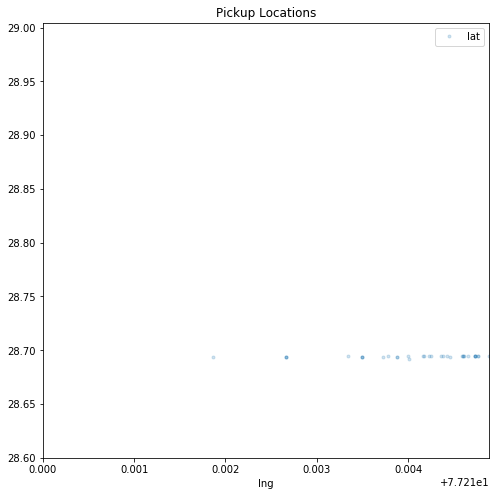

In [0]:
test = test[ride_df.lat>22.683]
test = test[test.lat<28.706]
test.plot(x='lng',y='lat',style='.',alpha=0.2,figsize=(8,8),xlim=77.210,ylim=28.6);
plt.title('Pickup Locations')

In [0]:
def counts_by_hexagon(df, resolution):
    """
    Use h3.geo_to_h3 to index each data point into the spatial index of the specified resolution.
    Use h3.h3_to_geo_boundary to obtain the geometries of these hexagons
    
    Ex counts_by_hexagon(data, 9)
    """
    df = df[["lat","lng"]]
    
    df["hex_id"] = df.apply(lambda row: h3.geo_to_h3(row["lat"], row["lng"], resolution), axis = 1)
    
    df_aggreg = df.groupby(by = "hex_id").size().reset_index()
    df_aggreg.columns = ["hex_id", "value"]
    
    df_aggreg["geometry"] =  df_aggreg.hex_id.apply(lambda x: 
                                                           {    "type" : "Polygon",
                                                                 "coordinates": 
                                                                [h3.h3_to_geo_boundary(h3_address=x,geo_json=True)]
                                                            }
                                                        )
    
    return df_aggreg

def hexagons_dataframe_to_geojson(df_hex, file_output = None):
    """
    Produce the GeoJSON for a dataframe that has a geometry column in geojson 
    format already, along with the columns hex_id and value
    
    Ex counts_by_hexagon(data)
    """    
    list_features = []
    
    for i,row in df_hex.iterrows():
        feature = Feature(geometry = row["geometry"] , id=row["hex_id"], properties = {"value" : row["value"]})
        list_features.append(feature)
        
    feat_collection = FeatureCollection(list_features)
    
    geojson_result = json.dumps(feat_collection)
    
    #optionally write to file
    if file_output is not None:
        with open(file_output,"w") as f:
            json.dump(feat_collection,f)
    
    return geojson_result


def choropleth_map(df_aggreg, border_color = 'black', fill_opacity = 0.7, initial_map = None, with_legend = False,
                   kind = "linear"):
    
    """
    Creates choropleth maps given the aggregated data.
    """    
    #colormap
    min_value = df_aggreg["value"].min()
    max_value = df_aggreg["value"].max()
    m = round ((min_value + max_value ) / 2 , 0)
    
    #take resolution from the first row
    res = h3.h3_get_resolution(df_aggreg.loc[0,'hex_id'])
    
    if initial_map is None:
        initial_map = Map(location= [28.600000, 77.100000], zoom_start=12, tiles="cartodbpositron",attr= '© <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors © <a href="http://cartodb.com/attributions#basemaps">CartoDB</a>')
        

    #the colormap 
    #color names accepted https://github.com/python-visualization/branca/blob/master/branca/_cnames.json
    if kind == "linear":
        custom_cm = cm.LinearColormap(['green','yellow','red'], vmin=min_value, vmax=max_value)
    elif kind == "outlier":
        #for outliers, values would be -11,0,1
        custom_cm = cm.LinearColormap(['blue','white','red'], vmin=min_value, vmax=max_value)
    elif kind == "filled_nulls":
        custom_cm = cm.LinearColormap(['sienna','green','yellow','red'], 
                                      index=[0,min_value,m,max_value],vmin=min_value,vmax=max_value)
   

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg)
    
    #plot on map
    name_layer = "Choropleth " + str(res)
    if kind != "linear":
        name_layer = name_layer + kind
        
    GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': custom_cm(feature['properties']['value']),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity 
        }, 
        name = name_layer
    ).add_to(initial_map)
    #add legend (not recommended if multiple layers)
    if with_legend == True:
        custom_cm.add_to(initial_map)
    
    
    
    return initial_map

def plot_scatter(df, metric_col, x='lng', y='lat', marker='.', alpha=1, figsize=(16,12), colormap='viridis'):
    """
    Scatter plot function for h3 indexed objects
    """    
    df.plot.scatter(x=x, y=y, c=metric_col, title=metric_col
                    , edgecolors='none', colormap=colormap, marker=marker, alpha=alpha, figsize=figsize);
    plt.xticks([], []); plt.yticks([], [])


In [0]:
df_aggreg = counts_by_hexagon(df = test, resolution = 6)
df_aggreg.sort_values(by = "value", ascending = False, inplace = True)
# Creates a map using Folium
hexmap = choropleth_map(df_aggreg = df_aggreg, with_legend = True)
hexmap

In [0]:
df_aggreg_9 = counts_by_hexagon(df = dfgeo, resolution = 9)
df_aggreg_8 = counts_by_hexagon(df = dfgeo, resolution = 8)
df_aggreg_7 = counts_by_hexagon(df = dfgeo, resolution = 7)
df_aggreg_6 = counts_by_hexagon(df = dfgeo, resolution =6)


hexmap9 = choropleth_map(df_aggreg = df_aggreg_9,with_legend = False)
hexmap8 = choropleth_map(df_aggreg = df_aggreg_8, initial_map = hexmap9, with_legend = False)
hexmap7 = choropleth_map(df_aggreg = df_aggreg_7, initial_map = hexmap8 , with_legend = False)
hexmap6 = choropleth_map(df_aggreg = df_aggreg_6, initial_map = hexmap7, with_legend = False)

folium.map.LayerControl('bottomright', collapsed=False).add_to(hexmap6)

hexmap6.save('source/choropleth_multiple_res.html')
hexmap6

NameError: ignored

In [0]:
from folium.plugins import HeatMapWithTime

In [0]:
ride_df.dt = pd.to_datetime(ride_df.dt, format='%Y-%m-%d %H:%M:%S')
ride_df['month'] = ride_df.dt.apply(lambda x: x.month)
ride_df['week'] = ride_df.dt.apply(lambda x: x.week)
ride_df['day'] = ride_df.dt.apply(lambda x: x.day)
ride_df['hour'] = ride_df.dt.apply(lambda x: x.hour)
ride_df['year'] = ride_df.dt.apply(lambda x: x.year)

In [72]:
ride_df

,dt,lat,lng,month,week,day,hour,year
0,2019-05-06 21:34:41,28.698442,77.207397,5,19,6,21,2019
1,2019-05-06 21:48:23,28.698442,77.207397,5,19,6,21,2019
2,2019-05-07 11:36:10,28.698442,77.207397,5,19,7,11,2019
3,2019-05-07 21:19:20,28.692583,77.194580,5,19,7,21,2019
4,2019-05-08 14:56:55,28.698442,77.207397,5,19,8,14,2019
...,...,...,...,...,...,...,...,...
1252,2020-01-22 18:01:13,28.694111,77.189728,1,4,22,18,2020
1253,2020-01-23 11:05:16,28.694080,77.189713,1,4,23,11,2020
1254,2020-01-23 11:08:31,28.694082,77.189713,1,4,23,11,2020
1255,2020-01-23 14:49:15,28.694113,77.189735,1,4,23,14,2020


In [0]:
ride_df.info

<bound method DataFrame.info of                       dt        lat        lng  month  week  day  hour
0    2019-05-06 21:34:41  28.698442  77.207397      5    19    6    21
1    2019-05-06 21:48:23  28.698442  77.207397      5    19    6    21
2    2019-05-07 11:36:10  28.698442  77.207397      5    19    7    11
3    2019-05-07 21:19:20  28.692583  77.194580      5    19    7    21
4    2019-05-08 14:56:55  28.698442  77.207397      5    19    8    14
...                  ...        ...        ...    ...   ...  ...   ...
1252 2020-01-22 18:01:13  28.694111  77.189728      1     4   22    18
1253 2020-01-23 11:05:16  28.694080  77.189713      1     4   23    11
1254 2020-01-23 11:08:31  28.694082  77.189713      1     4   23    11
1255 2020-01-23 14:49:15  28.694113  77.189735      1     4   23    14
1256 2020-01-23 14:54:50  28.694113  77.189705      1     4   23    14

[1257 rows x 7 columns]>

In [0]:
def generateBaseMap(default_location=[28.705, 77.2158], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
base_map = generateBaseMap()
base_map

In [0]:
from folium.plugins import HeatMap

In [0]:
df_copy = ride_df[ride_df.month>1].copy()
df_copy['count'] = 1

In [0]:
df_copy[['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().sort_values('count', ascending=False).head(10)

,,count
lat,lng,
28.693302,77.212662,25
28.694107,77.189705,23
28.693829,77.213730,20
28.694777,77.214729,19
28.694477,77.215034,19
28.694883,77.214920,13
28.694864,77.214592,13
28.698442,77.207397,13
28.694111,77.189728,12


In [62]:
base_map = generateBaseMap()
HeatMap(data=df_copy[['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [63]:
base_map

In [64]:
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))

In [0]:
from folium.plugins import HeatMapWithTime

In [0]:
df_hour_list = []
for hour in df_copy.hour.sort_values().unique():
    df_hour_list.append(df_copy.loc[df_copy.hour == hour, ['lat', 'lng', 'count']].groupby(['lat', 'lng']).sum().reset_index().values.tolist())

In [67]:
base_map = generateBaseMap(default_zoom_start=11)
HeatMapWithTime(df_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

In [0]:
datatypes1 = {'acceptedTime': 'str',
            'source/latitude': 'float32',
            'source/longitude':'float32',
             'destination/latitude':'float32',
             'destination/longitude':'float32',
              'startTime': 'str',
              'endTime': 'str'}

In [106]:
columns1 = list(datatypes1.keys())
columns1

['acceptedTime',
 'source/latitude',
 'source/longitude',
 'destination/latitude',
 'destination/longitude',
 'startTime',
 'endTime']

In [0]:
chunksize1 = 1257

In [108]:
df_list2 = []

for df_chunk in tqdm(pd.read_csv('/content/drive/My Drive/BERT/testRideData.csv', dtype=datatypes,chunksize=chunksize,usecols=columns1)):
    # Alternatively, append the chunk to list and merge all
    df_list2.append(df_chunk)

1it [00:00, 35.12it/s]


In [109]:
df_list2

[             acceptedTime  ...            startTime
 0     2019-05-06 21:34:41  ...  2019-05-06 21:34:56
 1     2019-05-06 21:48:23  ...  2019-05-06 21:49:32
 2     2019-05-07 11:36:10  ...  2019-05-07 11:36:31
 3     2019-05-07 21:19:20  ...  2019-05-07 21:19:40
 4     2019-05-08 14:56:55  ...  2019-05-08 14:57:07
 ...                   ...  ...                  ...
 1252  2020-01-22 18:01:13  ...  2020-01-22 18:01:13
 1253  2020-01-23 11:05:16  ...  2020-01-23 11:05:16
 1254  2020-01-23 11:08:31  ...  2020-01-23 11:08:45
 1255  2020-01-23 14:49:15  ...  2020-01-23 14:49:15
 1256  2020-01-23 14:54:50  ...  2020-01-23 14:55:06
 
 [1257 rows x 7 columns]]

In [110]:
ride_df1 = pd.concat(df_list2)
ride_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
acceptedTime             1257 non-null object
destination/latitude     1257 non-null float64
destination/longitude    1257 non-null float64
endTime                  1257 non-null object
source/latitude          1257 non-null float32
source/longitude         1257 non-null float32
startTime                1257 non-null object
dtypes: float32(2), float64(2), object(3)
memory usage: 59.0+ KB


In [111]:
ride_df1

,acceptedTime,destination/latitude,destination/longitude,endTime,source/latitude,source/longitude,startTime
0,2019-05-06 21:34:41,28.685740,77.206383,2019-05-06 21:35:19,28.698442,77.207397,2019-05-06 21:34:56
1,2019-05-06 21:48:23,28.685740,77.206383,2019-05-06 21:50:57,28.698442,77.207397,2019-05-06 21:49:32
2,2019-05-07 11:36:10,28.685740,77.206383,2019-05-07 11:36:43,28.698442,77.207397,2019-05-07 11:36:31
3,2019-05-07 21:19:20,28.683289,77.203283,2019-05-07 21:20:10,28.692583,77.194580,2019-05-07 21:19:40
4,2019-05-08 14:56:55,28.685740,77.206383,2019-05-08 14:57:12,28.698442,77.207397,2019-05-08 14:57:07
...,...,...,...,...,...,...,...
1252,2020-01-22 18:01:13,28.695908,77.209213,2020-01-22 18:01:18,28.694111,77.189728,2020-01-22 18:01:13
1253,2020-01-23 11:05:16,28.695908,77.209213,2020-01-23 11:05:21,28.694080,77.189713,2020-01-23 11:05:16
1254,2020-01-23 11:08:31,28.695908,77.209213,2020-01-23 11:08:51,28.694082,77.189713,2020-01-23 11:08:45
1255,2020-01-23 14:49:15,28.695908,77.209213,2020-01-23 14:53:38,28.694113,77.189735,2020-01-23 14:49:15


In [0]:
ride_df2 = ride_df1.copy()

In [0]:
ride_df2.columns = ['dt1','dslat','dslng','dt2','srlat','srlng','dt3']

In [0]:
ride_df2.dt1 = pd.to_datetime(ride_df2.dt1, format='%Y-%m-%d %H:%M:%S')
ride_df2['month'] = ride_df2.dt1.apply(lambda x: x.month)
ride_df2['week'] = ride_df2.dt1.apply(lambda x: x.week) 
ride_df2['day'] = ride_df2.dt1.apply(lambda x: x.day)
ride_df2['hour'] = ride_df2.dt1.apply(lambda x: x.hour)
ride_df2['year'] = ride_df2.dt1.apply(lambda x: x.year)


ride_df2.dt2 = pd.to_datetime(ride_df2.dt2, format='%Y-%m-%d %H:%M:%S')
ride_df2['month1'] = ride_df2.dt2.apply(lambda x: x.month)
ride_df2['week1'] = ride_df2.dt2.apply(lambda x: x.week)
ride_df2['day1'] = ride_df2.dt2.apply(lambda x: x.day)
ride_df2['hour1'] = ride_df2.dt2.apply(lambda x: x.hour)
ride_df2['year1'] = ride_df2.dt2.apply(lambda x: x.year)


ride_df2.dt3 = pd.to_datetime(ride_df2.dt3, format='%Y-%m-%d %H:%M:%S')
ride_df2['month2'] = ride_df2.dt3.apply(lambda x: x.month)
ride_df2['week2'] = ride_df2.dt3.apply(lambda x: x.week)
ride_df2['day2'] = ride_df2.dt3.apply(lambda x: x.day)
ride_df2['hour2'] = ride_df2.dt3.apply(lambda x: x.hour)
ride_df2['year2'] = ride_df2.dt3.apply(lambda x: x.year)

In [130]:
ride_df2

,dt1,dslat,dslng,dt2,srlat,srlng,dt3,month,week,day,hour,year,month1,week1,day1,hour1,year1,month2,week2,day2,hour2,year2
0,2019-05-06 21:34:41,28.685740,77.206383,2019-05-06 21:35:19,28.698442,77.207397,2019-05-06 21:34:56,5,19,6,21,2019,5,19,6,21,2019,5,19,6,21,2019
1,2019-05-06 21:48:23,28.685740,77.206383,2019-05-06 21:50:57,28.698442,77.207397,2019-05-06 21:49:32,5,19,6,21,2019,5,19,6,21,2019,5,19,6,21,2019
2,2019-05-07 11:36:10,28.685740,77.206383,2019-05-07 11:36:43,28.698442,77.207397,2019-05-07 11:36:31,5,19,7,11,2019,5,19,7,11,2019,5,19,7,11,2019
3,2019-05-07 21:19:20,28.683289,77.203283,2019-05-07 21:20:10,28.692583,77.194580,2019-05-07 21:19:40,5,19,7,21,2019,5,19,7,21,2019,5,19,7,21,2019
4,2019-05-08 14:56:55,28.685740,77.206383,2019-05-08 14:57:12,28.698442,77.207397,2019-05-08 14:57:07,5,19,8,14,2019,5,19,8,14,2019,5,19,8,14,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,2020-01-22 18:01:13,28.695908,77.209213,2020-01-22 18:01:18,28.694111,77.189728,2020-01-22 18:01:13,1,4,22,18,2020,1,4,22,18,2020,1,4,22,18,2020
1253,2020-01-23 11:05:16,28.695908,77.209213,2020-01-23 11:05:21,28.694080,77.189713,2020-01-23 11:05:16,1,4,23,11,2020,1,4,23,11,2020,1,4,23,11,2020
1254,2020-01-23 11:08:31,28.695908,77.209213,2020-01-23 11:08:51,28.694082,77.189713,2020-01-23 11:08:45,1,4,23,11,2020,1,4,23,11,2020,1,4,23,11,2020
1255,2020-01-23 14:49:15,28.695908,77.209213,2020-01-23 14:53:38,28.694113,77.189735,2020-01-23 14:49:15,1,4,23,14,2020,1,4,23,14,2020,1,4,23,14,2020


In [0]:
ride_df2.drop(ride_df2.columns[[0, 3, 6]], axis = 1, inplace = True)

In [132]:
ride_df2.head()

,dslat,dslng,srlat,srlng,month,week,day,hour,year,month1,week1,day1,hour1,year1,month2,week2,day2,hour2,year2
0,28.685740,77.206383,28.698442,77.207397,5,19,6,21,2019,5,19,6,21,2019,5,19,6,21,2019
1,28.685740,77.206383,28.698442,77.207397,5,19,6,21,2019,5,19,6,21,2019,5,19,6,21,2019
2,28.685740,77.206383,28.698442,77.207397,5,19,7,11,2019,5,19,7,11,2019,5,19,7,11,2019
3,28.683289,77.203283,28.692583,77.194580,5,19,7,21,2019,5,19,7,21,2019,5,19,7,21,2019
4,28.685740,77.206383,28.698442,77.207397,5,19,8,14,2019,5,19,8,14,2019,5,19,8,14,2019


In [0]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [134]:
ride_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 19 columns):
dslat     1257 non-null float64
dslng     1257 non-null float64
srlat     1257 non-null float32
srlng     1257 non-null float32
month     1257 non-null int64
week      1257 non-null int64
day       1257 non-null int64
hour      1257 non-null int64
year      1257 non-null int64
month1    1257 non-null int64
week1     1257 non-null int64
day1      1257 non-null int64
hour1     1257 non-null int64
year1     1257 non-null int64
month2    1257 non-null int64
week2     1257 non-null int64
day2      1257 non-null int64
hour2     1257 non-null int64
year2     1257 non-null int64
dtypes: float32(2), float64(2), int64(15)
memory usage: 176.9 KB


In [137]:
MMS = MinMaxScaler()
ride_df2 = pd.DataFrame(MMS.fit_transform(ride_df2), columns=ride_df2.columns)

#  shift the data so we are predicting one time step future
X = ride_df2.iloc[:-1,:]
y = ride_df2.iloc[1:,-1257:] #IDs

# Train-Test-Split-90/10
X_train, X_test = X[:int(round(len(X)*0.8, 0))], X[int(round(len(X)*0.8, 0)):]
y_train, y_test = y[:int(round(len(y)*0.8, 0))], y[int(round(len(y)*0.8, 0)):]

#Reshape for LSTM/GRU layers
Xtr = X_train.values.reshape((1, X_train.shape[0], X_train.shape[1]))
ytr = y_train.values.reshape((1, y_train.shape[0], y_train.shape[1]))
Xte = X_test.values.reshape((1, X_test.shape[0], X_test.shape[1]))
yte = y_test.values.reshape((1, y_test.shape[0], y_test.shape[1]))

#Check data validity
print (len(X_train) + len(X_test), len(y_train) + len(y_test))

1256 1256


In [138]:
import keras.backend as K

def custom_r2(y_true, y_pred):
    baseline = K.sum((y_true - K.mean(y_true))**2)
    model_fit = K.sum((y_true - y_pred)**2)
    return 1. - model_fit/baseline

Using TensorFlow backend.


In [0]:
from keras.models import Sequential, Model, load_model
from keras.layers import LSTM, Dense, Dropout, GRU, TimeDistributed, Input, merge, Activation
from keras.layers import Reshape
from keras.optimizers import rmsprop, Adamax

In [0]:
def build_model(n_features, dropout, n_outputs, compile_model=1, load_weights=0, loss='mse', lr=0.01):
    '''
    Builds a n-Layer neural_network 
    
    Parmaters
    ---------
    
    '''
    model = Sequential()

    #DENSE - INPUT
    model.add(TimeDistributed(Dense(256, activation='relu'), input_shape=(None, n_features)))
    model.add(Dropout(dropout))
    
    #DENSE (2 Layers)
    model.add(TimeDistributed(Dense(256, activation='relu')))
    model.add(Dropout(dropout))
    model.add(TimeDistributed(Dense(256, activation='relu')))
    model.add(Dropout(dropout))

    #LSTM (1 Layers)
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(dropout))


    #DENSE (2 Layers)
    model.add(TimeDistributed(Dense(256, activation='relu')))
    model.add(Dropout(dropout))
    model.add(TimeDistributed(Dense(256, activation='relu')))
    model.add(Dropout(dropout))

    # LSTM (1 Layer)
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(dropout))

    # DENSE (2 Layers)
    model.add(TimeDistributed(Dense(256, activation='relu')))
    model.add(Dropout(dropout))
    model.add(TimeDistributed(Dense(256, activation='relu')))
    model.add(Dropout(dropout))
    
    #OUTPUT
    model.add(TimeDistributed(Dense(n_outputs, activation='relu')))

    if compile_model == 1:
        model.compile(loss=loss, optimizer=Adamax(lr=lr), metrics=[custom_r2])

    if load_weights == 1:
        model.load_weights('/content/drive/My Drive/BERT/'+file_name+'.h5')
        
    return model
    
    
def run_neural_network(model, Xtr, ytr, Xte, yte, n_epochs, batch_size=1, verbose=0, save_weights=0):
    '''
    Runs neural_network.

    Parameters
    ----------
    '''
    try: 
        start_time = time.time()
        print ('Executing ||', str(datetime.now())) 

        history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                  batch_size=1, verbose=verbose, nb_epoch=n_epochs, shuffle=False)

        print ('Execution_Complete || Runtime w/', n_epochs, 'epochs =', round((time.time() - start_time)/60., 2), 'minutes')

        if save_weights == 1:
            save_unit_weights()

        return history
    except KeyboardInterrupt:
        pass
    except:
        print ('--Error in running model---')
    
    
def save_unit_weights():
    '''
    Saves weights of previously run neural_network.

    Parameters
    ----------
    '''
    file_name = str(datetime.now()).replace(':', '_').replace(' ','_')[:19]
    model.save_weights('/content/drive/My Drive/BERT/'+file_name+'.h5', overwrite=True)
    print ('Saved ||', str(datetime.now()))
    
    
def plot_neural_net_results(history, limit_r2=0, save_results=0):
    '''
    Plots results of neural network.

    Parameters
    ----------
    '''
    results = pd.DataFrame(history.history)
    
    # SUMMARY RESULTS
    print ('---MAX RESULTS--- \n', results[['custom_r2','val_custom_r2']].iloc[:].max(), '\n')
    print ('---TAIL RESULTS--- \n', results[['custom_r2','val_custom_r2']].iloc[-1:], '\n')

    # Build figure
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,4.5))

    # Assign Axis Plots
    ax0.plot(results[['custom_r2', 'val_custom_r2']].iloc[:])
    ax1.plot(results[['loss', 'val_loss']].iloc[:])

    # Add horizontal and vertical line for max
    ax0.axhline(results['val_custom_r2'].max(), color='red', lw=0.5)
    ax0.axvline(results['val_custom_r2'].idxmax(), color='red', lw=0.5)
     #Set axis limits
    if limit_r2 == 1:
        ax0.set_ylim(bottom=0.5, top=0.6)

    # Rename axis titles
    ax0.set_title('r2', fontsize=15)
    ax1.set_title('loss', fontsize=15)

    #ax0.legend(loc='lower right')

    # Show plots
    plt.show()

    if save_results == 1:
        file_name = str(datetime.now()).replace(':', '_').replace(' ','_')[:19]
        results.to_csv('/content/drive/My Drive/BERT/'+ file_name + '.csv')    

In [165]:
# Build Model
model = build_model(n_features=Xtr.shape[2], dropout=0.5, n_outputs=263, compile_model=1, load_weights=0, lr=0.001)

# Run Model
#history = run_neural_network(model=model, Xtr=Xtr, ytr=ytr, Xte=Xte, yte=yte, save_weights=1, verbose=0, n_epochs=6000)

history = model.fit_generator(Xtr,
                          steps_per_epoch=1000,
                          epochs=30,
                          verbose=0,
                          validation_data=Xte,
                          validation_steps=200)

# Plot Model
plot_neural_net_results(history, save_results=1)

ValueError: ignored

In [153]:
import time
start_time = time.time()
predictions = model.predict(Xtr)
predictions = pd.DataFrame(predictions.reshape(predictions.shape[1], predictions.shape[2]))
print (predictions.shape[0], 'predictions', '('+ str(round((time.time() - start_time), 2)) +') seconds')







1005 predictions (10.72) seconds


In [155]:
predictions.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262
0,0.000160,0.0,0.0,0.000194,0.000150,0.0,0.0,0.000220,0.0,0.0,0.0,0.000234,0.000037,0.000314,0.000166,0.0,0.000451,0.000837,0.000000,0.0,0.0,0.000188,0.000780,0.0,0.0,0.000237,0.000245,0.000303,0.000896,0.0,0.0,0.00006,0.0,0.000372,0.0,0.000000e+00,0.0,0.000483,0.000911,0.0,...,0.000380,0.0,0.0,0.000120,0.0,0.000083,0.0,0.000569,0.000476,0.000057,0.001002,0.000164,0.000424,0.000047,0.0,0.000427,0.0,0.0,0.000373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000402,0.0,0.000392,0.0,0.0,0.000000,0.0,0.000912,0.000258,0.0,0.0,0.0,0.0,0.0
1,0.000268,0.0,0.0,0.000490,0.000285,0.0,0.0,0.000438,0.0,0.0,0.0,0.000570,0.000133,0.000802,0.000342,0.0,0.000968,0.002031,0.000000,0.0,0.0,0.000487,0.001779,0.0,0.0,0.000474,0.000501,0.000839,0.002221,0.0,0.0,0.00000,0.0,0.000888,0.0,0.000000e+00,0.0,0.001124,0.002169,0.0,...,0.000837,0.0,0.0,0.000291,0.0,0.000237,0.0,0.001374,0.001065,0.000039,0.002399,0.000433,0.000946,0.000157,0.0,0.001136,0.0,0.0,0.000798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001017,0.0,0.001048,0.0,0.0,0.000000,0.0,0.002101,0.000492,0.0,0.0,0.0,0.0,0.0
2,0.000239,0.0,0.0,0.000905,0.000335,0.0,0.0,0.000569,0.0,0.0,0.0,0.000875,0.000296,0.001235,0.000644,0.0,0.001526,0.003100,0.000000,0.0,0.0,0.000767,0.002675,0.0,0.0,0.000713,0.000622,0.001437,0.003607,0.0,0.0,0.00000,0.0,0.001248,0.0,4.960195e-07,0.0,0.001681,0.003266,0.0,...,0.001343,0.0,0.0,0.000555,0.0,0.000281,0.0,0.002043,0.001535,0.000000,0.003852,0.000695,0.001436,0.000420,0.0,0.001773,0.0,0.0,0.001177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001691,0.0,0.001942,0.0,0.0,0.000018,0.0,0.003281,0.000547,0.0,0.0,0.0,0.0,0.0
3,0.000101,0.0,0.0,0.001281,0.000406,0.0,0.0,0.000562,0.0,0.0,0.0,0.001281,0.000467,0.001813,0.000941,0.0,0.001975,0.004328,0.000044,0.0,0.0,0.001136,0.003416,0.0,0.0,0.000858,0.000724,0.002137,0.005019,0.0,0.0,0.00000,0.0,0.001638,0.0,1.935073e-04,0.0,0.002125,0.004423,0.0,...,0.001642,0.0,0.0,0.000862,0.0,0.000393,0.0,0.002783,0.001974,0.000000,0.005300,0.000969,0.001889,0.000632,0.0,0.002489,0.0,0.0,0.001482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002462,0.0,0.002884,0.0,0.0,0.000150,0.0,0.004331,0.000522,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.001717,0.000445,0.0,0.0,0.000567,0.0,0.0,0.0,0.001580,0.000703,0.002293,0.001264,0.0,0.002492,0.005436,0.000397,0.0,0.0,0.001475,0.003933,0.0,0.0,0.000980,0.000720,0.002757,0.006321,0.0,0.0,0.00000,0.0,0.001928,0.0,5.067934e-04,0.0,0.002363,0.005289,0.0,...,0.001862,0.0,0.0,0.001283,0.0,0.000483,0.0,0.003440,0.002313,0.000000,0.006581,0.001247,0.002272,0.000869,0.0,0.003025,0.0,0.0,0.001752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003230,0.0,0.003949,0.0,0.0,0.000451,0.0,0.005132,0.000359,0.0,0.0,0.0,0.0,0.0


In [0]:
def inverse_transform(x):
    lst = []
    counter = 0
    for i in x:
        i -= MMS.data_min_[19 + counter]
        i /= MMS.scale_[19 + counter]
        lst.append(int(i))
        #print counter
        if counter != 262:
            counter += 1
        else:
            counter = 0
            
    return lst

In [157]:
predictions = predictions.apply(inverse_transform)

IndexError: ignored